# Test penalty visualization

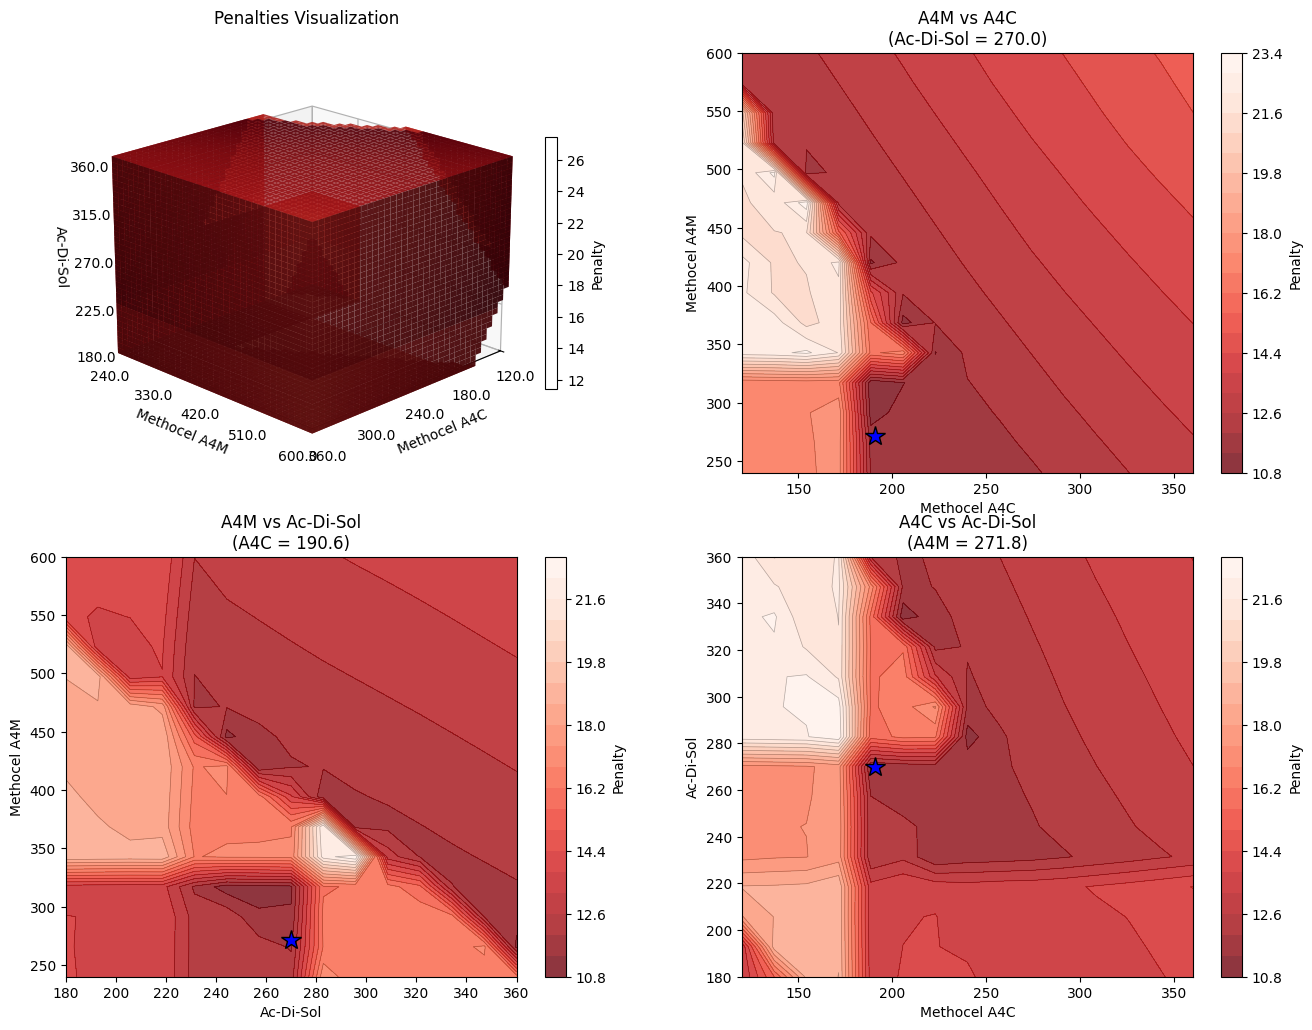

In [1]:
import matplotlib.pyplot as plt
from experiment_configs.dataset import (GEL_BOUNDS, DatasetConfig, FORMULATION_COLUMNS,
                                        PRINTING_CONDITION_COLUMNS,
                                        REGRESSION_TARGET_COLUMNS, CLASSIFICATION_TARGET_COLUMNS,
                                        Target)
from optimization.best_model_selector import get_best_models
from training.standard_cv import cross_validate_model
from training.runner import run_cv_experiment
from optimization.composit_objective import composit_objective_function
from optimization.grid_operation import create_3d_parameter_grid
from optimization.visualizer import visualize_penalties
import numpy as np

top_models = 1
best_models = {}

for target_column in REGRESSION_TARGET_COLUMNS + CLASSIFICATION_TARGET_COLUMNS:
    dataset = DatasetConfig(
        data_path=r"data/Data_average_new.csv",
        dataset_types=['Optimization'],
        input_columns=FORMULATION_COLUMNS + PRINTING_CONDITION_COLUMNS,
        target_column=target_column
    )
    best_models[target_column] = get_best_models(dataset, top_models=top_models)

a4c, a4m, ac_disol, X = create_3d_parameter_grid(
    num_points=35,
    pressure_fixed=(GEL_BOUNDS['Pressure'][0] + GEL_BOUNDS['Pressure'][1]) / 2,
    speed_fixed=(GEL_BOUNDS['Speed'][0] + GEL_BOUNDS['Speed'][1]) / 2
)

penalties = composit_objective_function(best_models=best_models,
                                        X=X,
                                        )
visualize_penalties(penalties=penalties)
